In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
data=pd.read_excel("data2.xlsx")

In [16]:
data.head()

,Unnamed: 0,Cel,Hem,Lig,VM,Ash,FC,C%,H%,O%,...,PS,HT,PT,Tem,Yield,Vis,H/C,O/C,Calorific value,rf
0,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.0,100,500.0,40.0,51.20,0.08256,1.45,0.24,29.71,[1]
1,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.0,100,500.0,40.0,50.15,0.02533,1.57,0.16,35.92,[1]
2,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.0,100,500.0,40.0,53.25,0.03058,1.58,0.17,35.61,[1]
3,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.0,100,500.0,40.0,49.65,0.03189,1.45,0.18,34.32,[1]
4,Date seed,64.5,14.00,8,81.15,5.17,7.63,70.91,10.50,16.59,...,0.1,16,500.0,25.0,68.50,0.00142,NaN,NaN,29.06,[2]


In [17]:
df=pd.DataFrame(data)

In [18]:
# df=df.drop(['one','two'],axis=1)
df

,Unnamed: 0,Cel,Hem,Lig,VM,Ash,FC,C%,H%,O%,...,PS,HT,PT,Tem,Yield,Vis,H/C,O/C,Calorific value,rf
0,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.00,100,500.0,40.0,51.20,0.08256,1.45,0.24,29.71,[1]
1,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.00,100,500.0,40.0,50.15,0.02533,1.57,0.16,35.92,[1]
2,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.00,100,500.0,40.0,53.25,0.03058,1.58,0.17,35.61,[1]
3,Mahua seed,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,...,1.00,100,500.0,40.0,49.65,0.03189,1.45,0.18,34.32,[1]
4,Date seed,64.5,14.00,8,81.15,5.17,7.63,70.91,10.50,16.59,...,0.10,16,500.0,25.0,68.50,0.00142,NaN,NaN,29.06,[2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Mahua seed,NaN,NaN,NaN,91.76,1.49,1.10,55.87,7.94,33.20,...,1.00,15,500.0,25.0,31.00,0.034,NaN,NaN,NaN,[139]
316,Castor seeds,NaN,NaN,NaN,61.29,9.14,2.20,29.29,3.91,29.84,...,1.00,20,550.0,40.0,66.66,0.08036,NaN,NaN,NaN,[140]
317,Neem seed,NaN,NaN,NaN,71,4.95,8.05,38.42,8.27,45.14,...,1.25,20,475.0,40.0,38.00,0.02172,NaN,NaN,32.30,[141]
318,Polanga seed cake,NaN,NaN,NaN,73.49,2.08,24.09,42.22,6.70,46.92,...,1.80,20,550.0,40.0,46.00,0.00147,NaN,NaN,NaN,[142]


In [19]:
df=df.dropna(0)

In [20]:
df=df.drop(['Unnamed: 0','Tem','rf'],axis=1)


In [21]:
cols=list(df.columns)
a,b=cols.index('Calorific value'),cols.index('Yield')
cols[b],cols[a]=cols[a],cols[b]
df=df[cols]

In [48]:
# df = df[df[df.columns[7]] != 550]
df


,Cel,Hem,Lig,VM,Ash,FC,C%,H%,O%,N%,PS,HT,PT,Calorific value,Vis,H/C,O/C,Yield
0,37.92,27.33,14.2,77.05,2.080,12.630,52.48,8.69,34.86,2.62,1.00,100,500.0,29.71,0.08256,1.45,0.24,51.20
1,37.92,27.33,14.2,77.05,2.080,12.630,52.48,8.69,34.86,2.62,1.00,100,500.0,35.92,0.02533,1.57,0.16,50.15
2,37.92,27.33,14.2,77.05,2.080,12.630,52.48,8.69,34.86,2.62,1.00,100,500.0,35.61,0.03058,1.58,0.17,53.25
3,37.92,27.33,14.2,77.05,2.080,12.630,52.48,8.69,34.86,2.62,1.00,100,500.0,34.32,0.03189,1.45,0.18,49.65
9,38.8,19.80,27,81.5,1.750,16.700,48.60,6.01,44.10,0.99,2.00,30,450.0,25.30,0.00245,4.18,0.67,27.70
10,38.8,19.80,27,81.5,1.750,16.700,48.60,6.01,44.10,0.99,2.00,30,550.0,25.40,0.00267,3.10,0.59,30.50
11,38.8,19.80,27,81.5,1.750,16.700,48.60,6.01,44.10,0.99,2.00,30,600.0,28.50,0.0027,2.48,0.49,32.26
12,38.8,19.80,27,81.5,1.750,16.700,48.60,6.01,44.10,0.99,2.00,30,650.0,28.90,0.00279,2.42,0.46,31.97
13,32,19.20,18.8,84.4,3.900,11.900,42.00,6.10,47.40,0.40,2.00,6,600.0,36.30,0.0092,2.23,0.56,37.00
14,34.3,29.00,20.9,62.7,12.700,15.100,37.86,5.24,35.32,0.68,1.50,180,550.0,18.07,0.00857,2.34,0.88,48.10


In [51]:
dft= np.array(df)
X = dft[:,0:14]
Y = dft[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
rf = RandomForestRegressor(n_estimators=12, random_state=0)
Y = y_train.ravel()
y_train = np.array(Y).astype(int)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 value is: "+ str(r2))
print("RMSE value is:"+ str(rmse))

R2 value is: 0.9153361888973566
RMSE value is:12.340743589743587


In [26]:
# dft= np.array(df)
# X = dft[:,0:14]
# Y = dft[:,14]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
# rf = RandomForestRegressor(n_estimators=6, random_state=37)
# Y = y_train.ravel()
# y_train = np.array(Y).astype(int)
# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)
# from sklearn.metrics import mean_squared_error, r2_score
# rmse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# r2

In [27]:
rmse

12.340743589743587

0.31372299879331333
0.6388426302787962
0.7308069049793418
0.8345294803965639
0.8582745016747848
0.850890480567208
0.8506126137036715
0.860735644144612
0.8769926087005059
0.8865862487001767
0.9073180771440704
0.9153361888973566
0.8723347464670969
0.8568768959713974
0.8442893786660695
0.857736479267754
0.8537903385383661
0.8533052763087889
0.8684485361712095
0.8604672266391918
0.8599450870398538
0.8547453203197535
0.8696761507412771
0.8645689548450238
0.8514279224694347
0.8468101781878951
0.8465482554068816
0.8417915524151554
0.8462113520594883
0.8501813265166788
0.8553845795126543
0.8613787758518884
0.8624895664895691
0.8541790704121853
0.8550876487708923
0.8553071709060716
0.8500440051843593
0.8555666506934088
0.8583617727359015
0.8635538630353881
0.8623048230570861
0.8571048497131504
0.8565985561350553
0.8562762763496659
0.8581986907443698
0.8606063791973687
0.8497342155269443
0.8510159450998267
0.8462872891351807
0.8402761085445583
0.8408224849170746
0.8427227092753639
0.840775039225

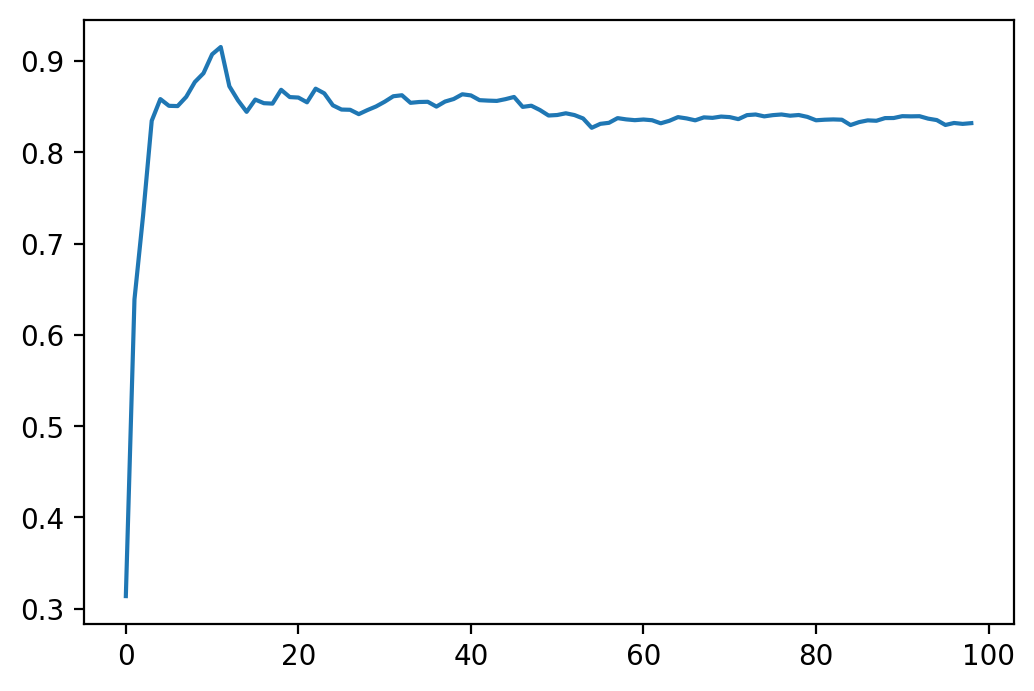

In [28]:
cost = []
for i in range(1,100):
    rf = RandomForestRegressor(n_estimators=i, random_state=0)
    Y = y_train.ravel()
    y_train = np.array(Y).astype(int)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cost.append(r2)

import matplotlib.pyplot as plt
fig=plt.figure(dpi=200)
plt.plot(cost)
for i in cost:
    print(i)

In [29]:
new_sample=[37.92,27.33,14.2,77.05,2.080,12.63,52.48,8.69,34.86,2.62,1.0,100,500.0,29.71] ##mahua seed
pred=rf.predict([new_sample])
pred

array([49.77777778])

In [30]:
new=[38.80,19.8,27,81.5,1.750,16.70,48.60,6.01,44.10,0.99,2.00,100,500.0,25.0]##grass stem
pred=rf.predict([new])
print("Grass Stem Bio Oil Yield is: " + str(pred))

Grass Stem Bio Oil Yield is: [31.06060606]


In [31]:
new1=[39,18,20,79.8,2.1,18.1,76,3.1,19.4,1.5,0.05,45,450,16]
rf.predict([new1])

array([46.67676768])

In [32]:
new3=[40,7,36.72,72.28,3.47,17.56,53.48,6.06,28.94,1.25,3,70,550,25.6]
rf.predict([new3])

array([44.1043771])

In [33]:
new4=[37.92,27.33,14.2,77.05,2.08,12,52.48,8.69,34.86,2.62,1,100,550,29.71]
rf.predict([new4])

array([49.73737374])

In [35]:
print(len(importances))

14


In [36]:
imp=importances

In [38]:
my_df = pd.DataFrame(X)
importances = rf.feature_importances_
sum=0
for i in range(len(importances)):
    print(df.columns[i], ':', importances[i])
#     sum+=importances[i]
#     print(sum)

Cel : 0.10015361815413272
Hem : 0.03906470538697013
Lig : 0.060758567032037844
VM : 0.01930672998198989
Ash : 0.02457716928338759
FC : 0.03327675939426301
C% : 0.022117483998150066
H% : 0.03322842123723494
O% : 0.1357915047715375
N% : 0.06304366984709563
PS : 0.37149916320136184
HT : 0.0533080659942724
PT : 0.009626090083691728
Calorific value : 0.034248051633874725


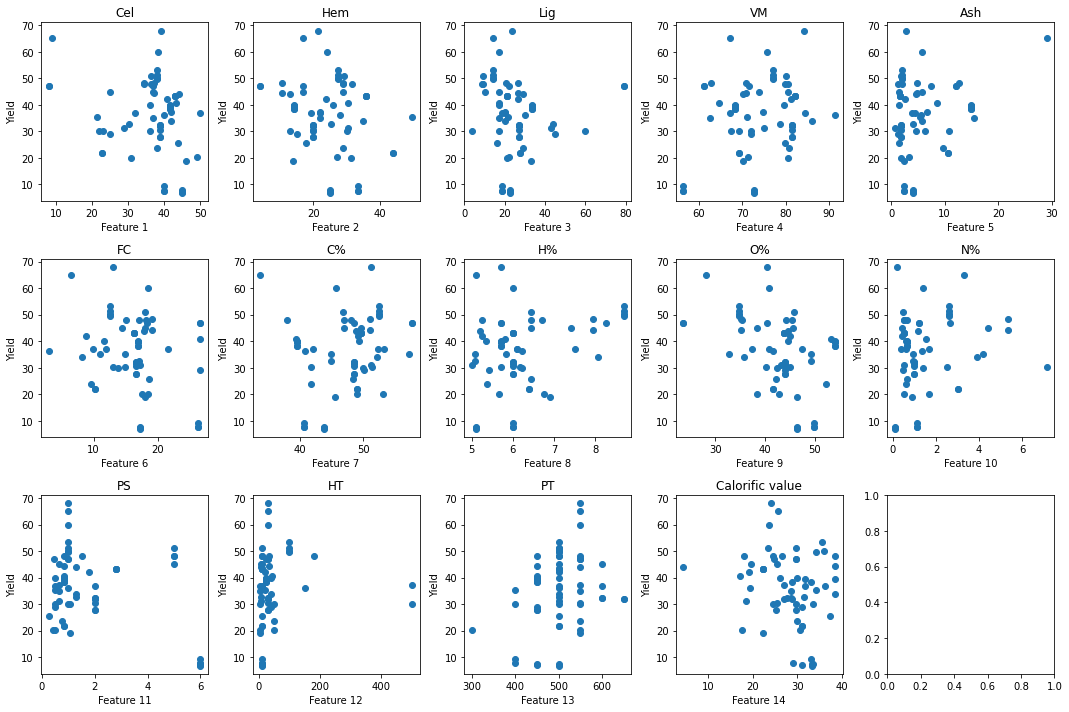

In [52]:
# Create a figure with subplots for each feature
fig, axs = plt.subplots(3, 5, figsize=(15, 10))

# Flatten the axis array for easier indexing
axs = axs.ravel()

# Plot each feature against the yield variable
for i in range(X.shape[1]):
    if(i==14):
        break
    axs[i].plot(X[:, i], Y, 'o')
    axs[i].set_title(df.columns[i])
    axs[i].set_xlabel(f"Feature {i+1}")
    axs[i].set_ylabel("Yield")

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

In [43]:
display(df)

,Cel,Hem,Lig,VM,Ash,FC,C%,H%,O%,N%,PS,HT,PT,Calorific value,Vis,H/C,O/C,Yield
0,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.00,100,500.0,29.71,0.08256,1.45,0.24,51.20
1,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.00,100,500.0,35.92,0.02533,1.57,0.16,50.15
2,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.00,100,500.0,35.61,0.03058,1.58,0.17,53.25
3,37.92,27.33,14.2,77.05,2.08,12.63,52.48,8.69,34.86,2.62,1.00,100,500.0,34.32,0.03189,1.45,0.18,49.65
9,38.8,19.80,27,81.5,1.75,16.70,48.60,6.01,44.10,0.99,2.00,30,450.0,25.30,0.00245,4.18,0.67,27.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.14,10.44,26.73,70.85,4.80,19.18,51.17,7.95,35.11,5.32,0.85,35,450.0,38.48,0.0615,1.68,0.10,48.21
306,38.8,19.80,27,81.5,1.75,16.70,48.60,6.01,44.10,0.99,2.00,30,450.0,29.70,0.00245,10.80,0.26,27.70
308,38.8,19.80,27,81.5,1.75,16.70,48.60,6.01,44.10,0.99,2.00,30,600.0,27.60,0.0027,7.81,0.15,32.26
309,38.8,19.80,27,81.5,1.75,16.70,48.60,6.01,44.10,0.99,2.00,30,650.0,27.10,0.00279,7.43,0.15,31.97


In [102]:
df = df[df[df.columns[7]] != 550]